# Game: Guess What?

This is a game that was introduced by \cite{DeVries2016:guesswhat}. There is a question answerer, who knows what the target object in the jointly seen image is, but is only allowed to say "yes" or "no"; and a questioner, who needs to identify the object. The game ends when the object has been identified (the last reply is positive and denotes only a single object). The resulting interaction consists of a sequence of polar questions, and hence there is some similarity to (polar) VQA. A big difference, however, is that here the questions are asked in service of a goal, which is to identify an object.

In [1]:
# imports
import configparser
import sys
import os
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load up config file (needs path; adapt env var if necessary); local imports
config_path = os.environ.get('VISCONF')
if not config_path:
    # try default location, if not in environment
    default_path_to_config = '../../clp-vision/Config/default.cfg'
    if os.path.isfile(default_path_to_config):
        config_path = default_path_to_config

assert config_path is not None, 'You need to specify the path to the config file via environment variable VISCONF.'        

config = configparser.ConfigParser()
with open(config_path, 'r', encoding='utf-8') as f:
    config.read_file(f)

corpora_base = config.get('DEFAULT', 'corpora_base')
preproc_path = config.get('DSGV-PATHS', 'preproc_path')
dsgv_home = config.get('DSGV-PATHS', 'dsgv_home')

sys.path.append(dsgv_home + '/Utils')
from utils import icorpus_code, plot_labelled_bb, get_image_filename, plot_img_ax, query_by_id
sys.path.append('../Common')
from data_utils import load_dfs

In [3]:
# Load up preprocessed DataFrames. Slow!
# These DataFrames are the result of pre-processing the original corpus data,
# as per dsg-vision/Preprocessing/preproc.py

df_names = ['mscoco_bbdf', 'gw_df', 'mscoco_catsdf']
df = load_dfs(preproc_path, df_names)

['Is it food?' 'No']
['Is it a utensil?' 'Yes']
['Is it the wooden spoon?' 'No']
['Is it the knife?' 'Yes']


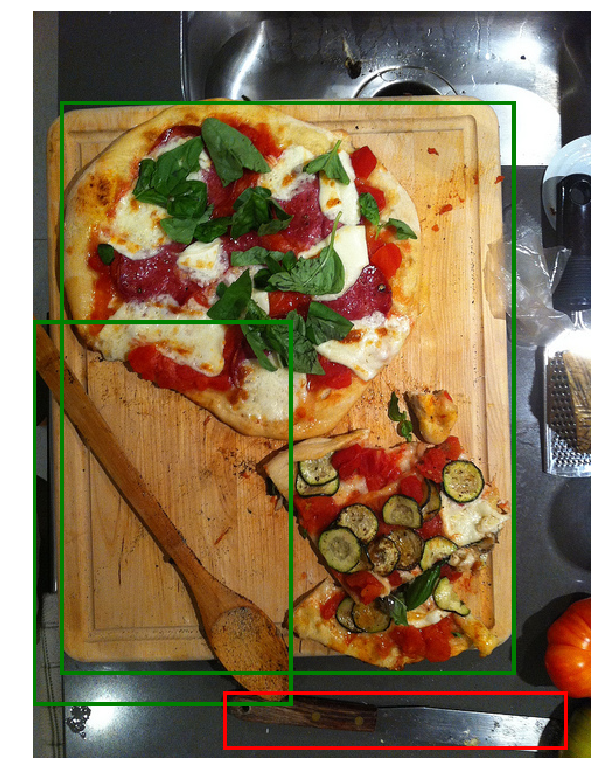

In [4]:
# an example dialogue
this_dial = 49
this_dial_df = df['gw_df'].query('(dial_id == @this_dial) & (split == "train")')
ic, ii, target, all_obj = this_dial_df.iloc[0]['corpus_id image_id target all_objs'.split()]
all_turns = this_dial_df[['q', 'a']].values

cont = True

bbs = []
for this_obj_id in all_obj:
    query_result = query_by_id(df['mscoco_bbdf'], (ic, ii, this_obj_id), column='bb')
    if len(query_result) == 0:
        print("objects not annotated??", this_obj_id)
        cont = False
        break
    bbs.append((query_result[0], ('', 'green')))
    

for this_turn in all_turns:
    print(this_turn)

if cont:
    bbs.append((query_by_id(df['mscoco_bbdf'], (ic, ii, target), column='bb')[0], ('', 'red')))
    plot_labelled_bb(get_image_filename(config, ic, ii), bbs)

['is it a person?' 'Yes']
['is he on the right?' 'Yes']


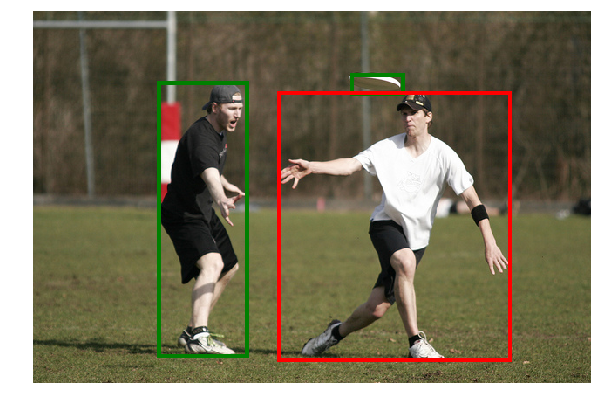

In [5]:
# an example dialogue
this_dial = 50
this_dial_df = df['gw_df'].query('(dial_id == @this_dial) & (split == "train")')
ic, ii, target, all_obj = this_dial_df.iloc[0]['corpus_id image_id target all_objs'.split()]
all_turns = this_dial_df[['q', 'a']].values

cont = True

bbs = []
for this_obj_id in all_obj:
    query_result = query_by_id(df['mscoco_bbdf'], (ic, ii, this_obj_id), column='bb')
    if len(query_result) == 0:
        print("objects not annotated??", this_obj_id)
        cont = False
        break
    bbs.append((query_result[0], ('', 'green')))
    

for this_turn in all_turns:
    print(this_turn)

if cont:
    bbs.append((query_by_id(df['mscoco_bbdf'], (ic, ii, target), column='bb')[0], ('', 'red')))
    plot_labelled_bb(get_image_filename(config, ic, ii), bbs)

Example questions:
* What kinds of "real" dialogue phenomena can be observed in the data? (Coherence, cohesion, etc.)
* E.g., how do you get from "is it a person? -- yes." to "is *he* on the right"?